In [1]:
import pandas as pd 
df = pd.read_csv("https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv")

In [2]:
df_head = df.head()
df_head

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


In [3]:
df_tail = df.tail(5)
df_tail

,id,created_on,title,description,tag
759,2431,2020-10-05 12:36:02,A Survey of the State of Explainable AI for NLP,Overview of the operations and explainability ...,natural-language-processing
760,2432,2020-10-05 13:09:58,Topic Modeling with BERT,Leveraging 🤗 Transformers and a class-based TF...,natural-language-processing
761,2434,2020-10-06 02:13:01,OpenMMLab Computer Vision,MMCV is a python library for CV research and s...,computer-vision
762,2436,2020-10-06 13:29:44,Machine Learning Methods Explained (+ Examples),Most common techniques used in data science pr...,other
763,2437,2020-10-06 14:53:39,Rasoee,A powerful web and mobile application that ide...,computer-vision


In [4]:
df.tag.value_counts()

tag
natural-language-processing    310
computer-vision                285
other                          106
mlops                           63
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split 

test_size = 0.2
train_df, val_df = train_test_split(df, stratify=df.tag, test_size=test_size, random_state=40)

In [6]:
train_df.tag.value_counts()

tag
natural-language-processing    248
computer-vision                228
other                           85
mlops                           50
Name: count, dtype: int64

In [7]:
val_df.tag.value_counts()

tag
natural-language-processing    62
computer-vision                57
other                          21
mlops                          13
Name: count, dtype: int64

In [8]:
# we are using this to match the propotion of the training dataset

val_df.tag.value_counts() * int((1 - test_size) / test_size)

tag
natural-language-processing    248
computer-vision                228
other                           84
mlops                           52
Name: count, dtype: int64

In [9]:
# EDA 

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import warnings; warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS

In [10]:
#most common tags

all_tags = Counter(df.tag)
all_tags.most_common()

[('natural-language-processing', 310),
 ('computer-vision', 285),
 ('other', 106),
 ('mlops', 63)]

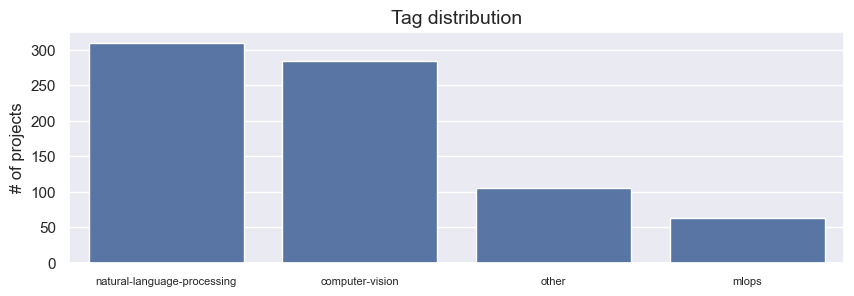

In [11]:

#splitting the tags and count using the zip function 
tags, tag_counts = zip(*all_tags.most_common())


plt.figure(figsize=(10, 3))
ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(tags, rotation=0, fontsize=8)
plt.title("Tag distribution", fontsize=14)
plt.ylabel("# of projects", fontsize=12)
plt.show()

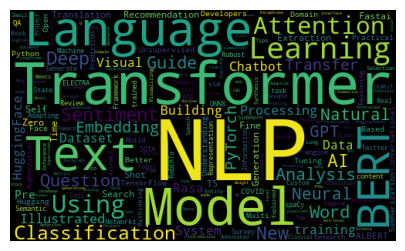

In [12]:
tag="natural-language-processing"
plt.figure(figsize=(10, 3))
subset = df[df.tag==tag]
text = subset.title.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text))
plt.axis("off")
plt.imshow(cloud)

In [13]:
import json
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

import re

In [14]:
df["text"] = df.title + " " + df.description 

In [15]:
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heysr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def clean_text(text, stopwords=STOPWORDS):
    """Clean raw text string."""
    # Lower
    text = text.lower()

    # Remove stopwords
    pattern = re.compile(r'\b(' + r"|".join(stopwords) + r")\b\s*")
    text = pattern.sub('', text)

    # Spacing and filters
    text = re.sub(r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text)  # add spacing
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()  # strip white space at the ends
    text = re.sub(r"http\S+", "", text)  #  remove links

    return text

In [17]:
df.head(6)

,id,created_on,title,description,tag,text
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision,Comparison between YOLO and RCNN on real world...
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision,"Show, Infer & Tell: Contextual Inference for C..."
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other,Awesome Graph Classification A collection of i...
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other,Awesome Monte Carlo Tree Search A curated list...
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other,"AttentionWalk A PyTorch Implementation of ""Wat..."
5,27,2020-03-07 23:18:15,APPNP and PPNP,"A PyTorch implementation of ""Predict then Prop...",other,"APPNP and PPNP A PyTorch implementation of ""Pr..."


In [18]:
df.text.values[20]

'Bachelorette Predictor Predict the Bachelorette winners from profile images.'

In [19]:
original_df = df.copy()
df.text = df.text.apply(clean_text)
print (original_df.text.values[10])

Coloring Greyscale Images Coloring black and white images with neural networks.


In [20]:
df = df.drop(columns=["id", "created_on", "title", "description"], errors="ignore")  # drop cols
df = df.dropna(subset=["tag"])  # drop nulls
df = df[["text", "tag"]]  # rearrange cols

In [21]:
df.head(5)

,text,tag
0,comparison yolo rcnn real world videos bringin...,computer-vision
1,show infer tell contextual inference creative ...,computer-vision
2,awesome graph classification collection import...,other
3,awesome monte carlo tree search curated list m...,other
4,attentionwalk pytorch implementation watch ste...,other


In [22]:
df.tail(5)

,text,tag
759,survey state explainable ai nlp overview opera...,natural-language-processing
760,topic modeling bert leveraging transformers cl...,natural-language-processing
761,openmmlab computer vision mmcv python library ...,computer-vision
762,machine learning methods explained examples co...,other
763,rasoee powerful web mobile application identif...,computer-vision


In [23]:
tags = train_df.tag.unique().tolist()
print(tags)

['mlops', 'other', 'computer-vision', 'natural-language-processing']


In [24]:
num_classes = len(tags)
print("Number of classes:",num_classes)

Number of classes: 4


In [25]:
## Encoding 

class_to_index = {tag: i for i,tag in enumerate(tags)}
class_to_index

{'mlops': 0,
 'other': 1,
 'computer-vision': 2,
 'natural-language-processing': 3}

In [26]:
# we use map function to map our class_to_index on our tag column

df["tag"] = df["tag"].map(class_to_index)
df.head(5)

,text,tag
0,comparison yolo rcnn real world videos bringin...,2
1,show infer tell contextual inference creative ...,2
2,awesome graph classification collection import...,1
3,awesome monte carlo tree search curated list m...,1
4,attentionwalk pytorch implementation watch ste...,1


In [27]:
index_to_class = {v:k for k, v in class_to_index.items()}

def decode(indices, index_to_class):
    return [index_to_class[index] for index in indices]


decode(df.head(5)["tag"].values, index_to_class=index_to_class)

['computer-vision', 'computer-vision', 'other', 'other', 'other']

Tokenizing the text

In [30]:
import numpy as np
from transformers import BertTokenizer

In [32]:
tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased", return_dict=False)
text = "Transfer learning with transformers for text classification."
encoded_inputs = tokenizer([text], return_tensors="pt", padding="longest")  # pad to longest item in batch
print ("input_ids:", encoded_inputs["input_ids"])
print ("attention_mask:", encoded_inputs["attention_mask"])
print (tokenizer.decode(encoded_inputs["input_ids"][0]))

input_ids: tensor([[  102,  2268,  1904,   190, 29155,   168,  3267,  2998,   205,   103]])
attention_mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
[CLS] transfer learning with transformers for text classification. [SEP]


In [33]:
def tokenize(batch):
    tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased", return_dict=False)
    encoded_inputs = tokenizer(batch["text"].tolist(), return_tensors="np", padding="longest")
    return dict(ids=encoded_inputs["input_ids"], masks=encoded_inputs["attention_mask"], targets=np.array(batch["tag"]))

In [35]:
def preprocess(df, class_to_index):
    
    """Preprocess the data."""
    df["text"] = df.title + " " + df.description  # feature engineering
    
    df["text"] = df.text.apply(clean_text)  # clean text
    
    df = df.drop(columns=["id", "created_on", "title", "description"], errors="ignore")  # clean dataframe
    
    df = df[["text", "tag"]]  # rearrange columns
    
    df["tag"] = df["tag"].map(class_to_index)  # label encoding
    outputs = tokenize(df)
    return outputs